## Seção 9: Otimização

In [22]:
import os
import pyspark
import findspark
from pyspark.sql import SparkSession

os.environ["SPARK_HOME"] = "C:\\ApacheSpark\\spark-3.5.3-bin-hadoop3"

findspark.init()
spark = SparkSession.builder.master('local[*]').getOrCreate()

### 69. Particionamento

Oque torna o Spark especial é sua arquitetura, que permite grandes volumes de dados sendo processados com alta performance.

Isso se dá a varias caracteristica do spark, como:
- Processar dados em memória;
- Operação em Cluster;
- Particionamento (divisão dos dados em disco, nos diferentes nós do clusters);
- Paralelismo (processar dados em paralelo);
- Redundância dos dados.

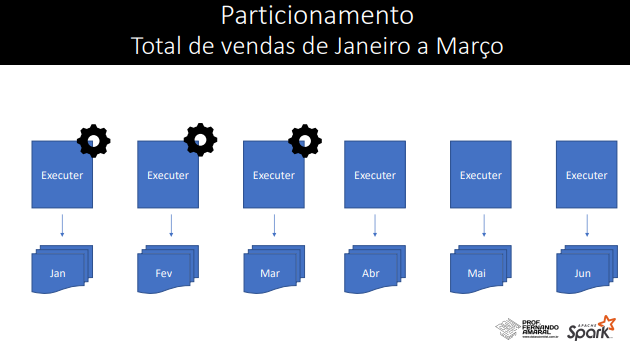

Por padrão, os dados são particionados de com o número de núcleos. Cada partição de dado fica em um nó e tem uma task especifica.

#### Shuffle
Redistribuição de dados entre partições.

#### Bucketing
Semelhante a particionamento, porém com número fixo de partições.
- Ideal para coluna com alta cardinalidade (muitos valores únicos) 

### 70. Particionamento e Bucketing no Spark

**Os processos abaixo foram rodadas direto no UBUNTU.**

#### **PartitionBy**

In [ ]:
spark.sql("CREATE DATABASE IF NOT EXISTS desp")
spark.sql("use desp")

churn = spark.read.csv(r"C:\Users\viser\OneDrive\Documentos\Cursos\UDEMY_Formação Spark com pySpark\Material\files\Churn.csv",inferSchema=True, header=True, sep=';')
churn.show(5)

O script abaixo cria diretorios para cada tipo de informação que temos na coluna Geography. 
Isso não afetaria a tabela que foi criada, caso fosse realizado um select * from iria retornar todos 
os dados juntos.

churn.write.partitionBy('Geography').saveAsTable('churn_geo')

+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|       0|            1|        1|             1|       10134888|     1|
|        608|    Spain|Female| 41|     1| 8380786|            1|        0|             1|       11254258|     0|
|        502|   France|Female| 42|     8| 1596608|            3|        1|             0|       11393157|     1|
|        699|   France|Female| 39|     1|       0|            2|        0|             0|        9382663|     0|
|        850|    Spain|Female| 43|     2|12551082|            1|        1|             1|         790841|     0|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+-------

#### **Buckecting**
Utilizado quando temos a cardinalidade muito alta.

bucketBy(<número de buckets>, <.Coluna>)


In [ ]:
Oo script abaixo criaria arquivos parquet para cada tipo de informação que temos na coluna Geography. 
Isso não afetaria a tabela que foi criada, caso fosse realizado um select * from iria retornar todos 
os dados juntos.

churn.write.bucketBy(3, 'Geography').saveAsTable('churn_geo2')

#### **Reutilização do DataFrame**
##### **Cache**
Os dados são mantidos em memória para que estejam disponiveis, assim o spark não precisa gerar os dados novamente.
##### **Persist**
Os dados são persistidos para que estejam disponiveis, assim o spark não precisa gerar os dados novamente. Ao persistir o usuário defini o metodo de persistência:

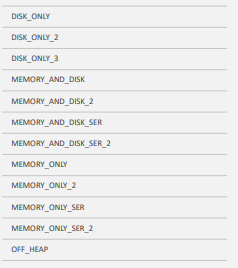




### 71. Cache e Persistência no Spark

In [25]:
from pyspark import StorageLevel

df = spark.read.csv(r"C:\Users\viser\OneDrive\Documentos\Cursos\UDEMY_Formação Spark com pySpark\Material\files\despachantes.csv",inferSchema=True, header=True, sep=';')
df.show(5)

+--------------------------------------------------+
|1,Carminda Pestana,Ativo,Santa Maria,23,2020-08-11|
+--------------------------------------------------+
|                              2,Deolinda Vilela...|
|                              3,Emídio Dornelle...|
|                              4,Felisbela Dorne...|
|                              5,Graça Ornellas,...|
|                              6,Matilde Rebouça...|
+--------------------------------------------------+
only showing top 5 rows



In [ ]:
# Verificar storageLevel do DataFrame

df.storageLevel

StorageLevel(False, False, False, False, 1)

**Parametros do StorageLevel**

StorageLevel(DISCO, MEMÓRIA, OFFHEAP, SERIALIZADO, REPLICAÇÃO)

In [30]:
df.cache()
df.storageLevel

StorageLevel(True, True, False, True, 1)

In [ ]:
df.persist(StorageLevel.DISK_ONLY)

# Nesse caso ao persistir, não foi alterado nada porque o dataframe já está em cache(DISK_ONLY)
df.storageLevel

StorageLevel(True, True, False, True, 1)

In [33]:
# Retirando o DataFrame do cache
df.unpersist()

DataFrame[1,Carminda Pestana,Ativo,Santa Maria,23,2020-08-11: string]

In [35]:
df.persist(StorageLevel.DISK_ONLY)
df.storageLevel

StorageLevel(True, False, False, False, 1)